In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
%matplotlib inline

## Loading the Dataset

In [ ]:
data = pd.read_csv(r"C:\Users\sydne\Desktop\archive\mobile_usage_behavioral_analysis.csv", index_col=0)
data.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
User ID,,,,,,,,,,
1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


## **Exploratory Data Analysis (EDA)**

In [ ]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 1 to 700
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device Model                700 non-null    object 
 1   Operating System            700 non-null    object 
 2   App Usage Time (min/day)    700 non-null    int64  
 3   Screen On Time (hours/day)  700 non-null    float64
 4   Battery Drain (mAh/day)     700 non-null    int64  
 5   Number of Apps Installed    700 non-null    int64  
 6   Data Usage (MB/day)         700 non-null    int64  
 7   Age                         700 non-null    int64  
 8   Gender                      700 non-null    object 
 9   User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 60.2+ KB


In [ ]:
data.columns.tolist()

['Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

In [ ]:
data.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [ ]:
data.describe()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [ ]:
data.values

array([['Google Pixel 5', 'Android', 393, ..., 40, 'Male', 4],
       ['OnePlus 9', 'Android', 268, ..., 47, 'Female', 3],
       ['Xiaomi Mi 11', 'Android', 154, ..., 42, 'Male', 2],
       ...,
       ['Google Pixel 5', 'Android', 99, ..., 50, 'Female', 2],
       ['Samsung Galaxy S21', 'Android', 62, ..., 44, 'Male', 1],
       ['OnePlus 9', 'Android', 212, ..., 23, 'Female', 3]], dtype=object)

In [ ]:
# Size and shape of the dataset
num_rows, num_columns = data.shape
print(f'Number of Rows: {num_rows}')
print(f'Number of Columns: {num_columns}')

Number of Rows: 700
Number of Columns: 10


In [ ]:
# Datatypes of each field
print("Data type of each column:\n", data.dtypes)

Data type of each column:
 Device Model                   object
Operating System               object
App Usage Time (min/day)        int64
Screen On Time (hours/day)    float64
Battery Drain (mAh/day)         int64
Number of Apps Installed        int64
Data Usage (MB/day)             int64
Age                             int64
Gender                         object
User Behavior Class             int64
dtype: object


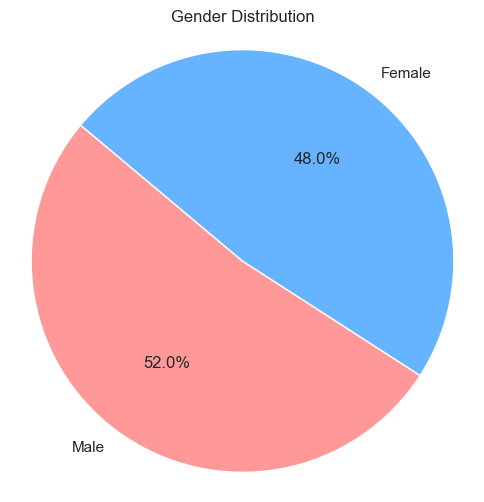

In [ ]:
# Gender distribution
plt.figure(figsize=(6, 6))
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

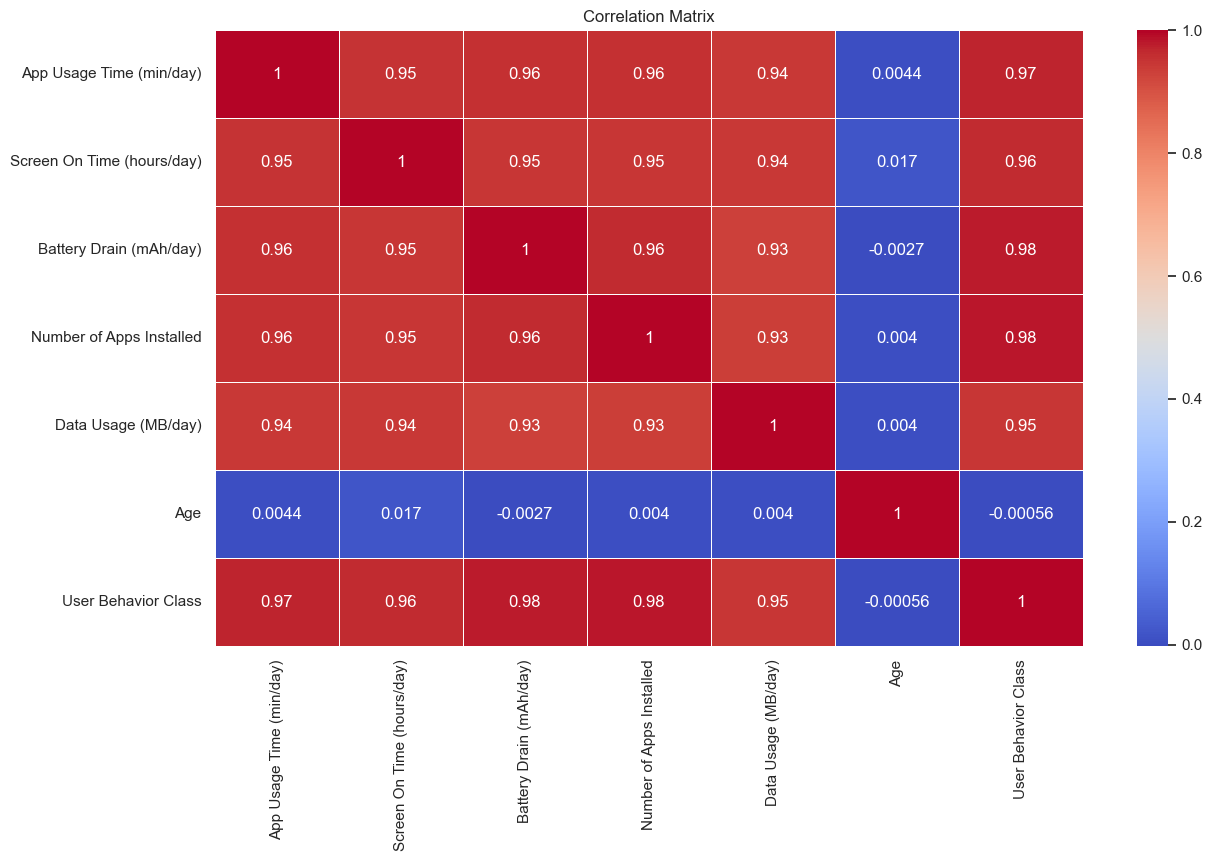

In [ ]:
# Compute the correlation matrix
corr = data.select_dtypes(include=np.number).corr()

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#### Data preprocessing


In [ ]:
# Encode categorical variables if present
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Defining features (X) and target (y)
X = data.drop(['User ID', 'User Behavior Class'], axis=1, errors='ignore')
y = data['User Behavior Class']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Building**

## **Logistic Regression**

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define algorithms to train
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Initialize an empty dictionary to store results
results = {}

# Train, predict, and evaluate
for model_name, model in models.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy and generate classification report
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {model_name}: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")



Training Logistic Regression...
Accuracy for Logistic Regression: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## **Random Forest**

In [ ]:
# Define algorithms to train
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Initialize an empty dictionary to store results
results = {}

# Train, predict, and evaluate
for model_name, model in models.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy and generate classification report
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {model_name}: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}") 


Training Random Forest...
Accuracy for Random Forest: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



## **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize the Gradient Boosting Classifier
models = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

# Initialize an empty dictionary to store results
results = {}

# Train, predict, and evaluate
for model_name, model in models.items():
    try:
        print(f"\nTraining {model_name}...")
        model.fit(X_train, y_train)  # Train the model
        y_pred = model.predict(X_test)  # Make predictions

        # Calculate accuracy and generate classification report
        acc = accuracy_score(y_test, y_pred)
        print(f"Accuracy for {model_name}: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))

        # Store results
        results[model_name] = {"accuracy": acc, "report": classification_report(y_test, y_pred)}

    except Exception as e:
        print(f"Error occurred while training {model_name}: {e}")



Training Gradient Boosting...
Accuracy for Gradient Boosting: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        46
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        47
           5       1.00      1.00      1.00        33

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [ ]:
# Display the comparison of model performance
print("\nModel Performance Comparison:")
for model_name in results:
    acc = results[model_name]["accuracy"]
    print(f"{model_name}: Accuracy = {acc:.2f}")


Model Performance Comparison:
Gradient Boosting: Accuracy = 1.00


In [ ]:
# Accuracy scores
acc_rf = accuracy_score(y_test, y_pred)
acc_gb = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"Gradient Boosting Accuracy: {acc_gb:.2f}")

Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


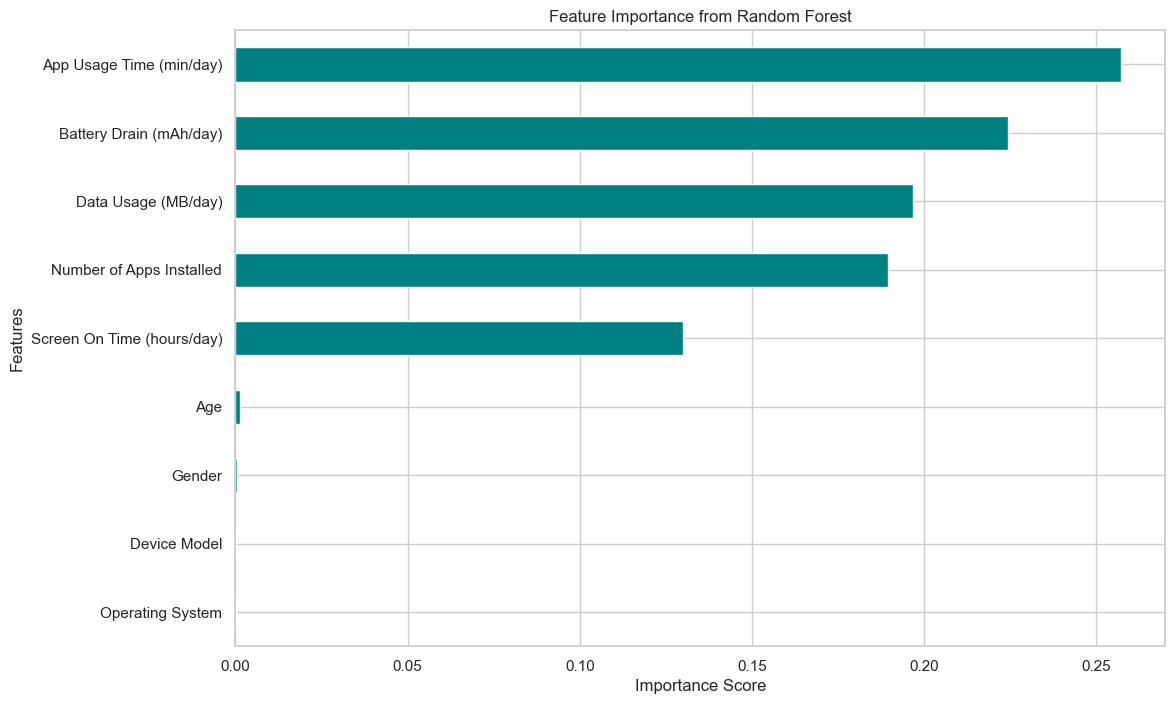

In [ ]:
# Assuming X_train and y_train are already defined
# Initialize and train RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

# Plotting feature importance
plt.figure(figsize=(12, 8))
forest_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()